In [78]:
# Importing all the necessary libraries
import numpy as np 
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [1]:
print("hello")

hello


In [3]:
df1=pd.read_csv('Hotel_Room_attributes.csv')
df2=pd.read_csv('Hotel_details.csv')
df3=pd.read_csv('hotels_RoomPrice.csv')

In [4]:
df1.head()

,id,hotelcode,roomamenities,roomtype,ratedescription
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed"
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"


In [5]:
df2.head()

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


In [6]:
df3.head()

,id,refid,hotelcode,websitecode,dtcollected,ratedate,los,guests,roomtype,onsiterate,...,promoname,status_code,taxstatus,taxtype,taxamount,proxyused,israteperstay,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,8646773,634876,5,2019-10-12 15:46:54,2019-11-02,1,1,Double Room,82.36,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.165.126:80,Y,Free Breakfast,NaN,2019-10-13
1,50672149,6234691,8328096,5,2019-10-12 15:47:45,2019-11-30,1,1,Vacation Home,636.09,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.164.126:80,Y,NaN,NaN,2019-10-13
2,50643430,7015677,8323442,5,2019-10-12 15:47:00,2019-12-20,1,1,Vacation Home,591.74,...,NaN,200,2,NaN,0.0,media:M3diAproxy@173.44.166.122:80,Y,NaN,NaN,2019-10-13
3,50650317,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,881.48,...,NaN,200,2,Tax 20%,0.0,media:M3diAproxy@209.242.219.141:80,Y,NaN,NaN,2019-10-13
4,50650318,7327094,7975,5,2019-10-12 15:47:02,2019-12-28,1,1,Standard Triple Room,897.53,...,NaN,200,2,VAT $ 179.51,0.0,media:M3diAproxy@209.242.219.141:80,Y,Free breakfast for {3},NaN,2019-10-13


In [8]:
# Rename 'hotelcode' to 'hotelid' in DataFrames df1 and df2
df1.rename(columns={'hotelcode': 'hotelid'}, inplace=True)
df2.rename(columns={'hotelcode': 'hotelid'}, inplace=True)

# Merge DataFrames df1 and df2 on 'hotelid' column
df = df1.merge(df2, on='hotelid')

df.head()


,id_x,hotelid,roomamenities,roomtype,ratedescription,id_y,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed",135972,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,NaN,Hotels,4,51.150921,-3.158470,5,https://www.agoda.com/en-gb/the-old-cider-hous...,GBP
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",66727,Pantlleni,NaN,Beddgelert,United Kingdom,NaN,Hotels,3,53.042229,-4.033180,5,https://www.agoda.com/en-gb/pantlleni/hotel/be...,GBP
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",65369,Willow Cottage,NaN,Beverley,United Kingdom,NaN,Hotels,3,53.843220,-0.497970,5,https://www.agoda.com/en-gb/willow-cottage/hot...,GBP
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",60309,Apollo Hotel London,64-66 Queensborough Terrace,London,United Kingdom,NaN,Hotels,2,51.511234,-0.185117,5,https://www.agoda.com/en-gb/apollo-hotel-londo...,GBP
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",60309,Apollo Hotel London,64-66 Queensborough Terrace,London,United Kingdom,NaN,Hotels,2,51.511234,-0.185117,5,https://www.agoda.com/en-gb/apollo-hotel-londo...,GBP


In [10]:
# Check the shape of the DataFrame to see the number of rows and columns
df.shape

(181415, 18)

In [11]:
# Check for missing values in each column of the DataFrame
df.isna().sum()

id_x                   0
hotelid                0
roomamenities       5309
roomtype               0
ratedescription     5309
id_y                   0
hotelname              0
address              577
city                   0
country                0
zipcode            86703
propertytype           0
starrating             0
latitude               0
longitude              0
Source                 0
url                    0
curr                   0
dtype: int64

In [12]:
# Check for the number of duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop(['zipcode'], axis=1, inplace= True)
data=df
data.head()

,id_x,hotelid,roomamenities,roomtype,ratedescription,id_y,hotelname,address,city,country,propertytype,starrating,latitude,longitude,Source,url,curr
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed",135972,The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,51.150921,-3.158470,5,https://www.agoda.com/en-gb/the-old-cider-hous...,GBP
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",66727,Pantlleni,NaN,Beddgelert,United Kingdom,Hotels,3,53.042229,-4.033180,5,https://www.agoda.com/en-gb/pantlleni/hotel/be...,GBP
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",65369,Willow Cottage,NaN,Beverley,United Kingdom,Hotels,3,53.843220,-0.497970,5,https://www.agoda.com/en-gb/willow-cottage/hot...,GBP
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",60309,Apollo Hotel London,64-66 Queensborough Terrace,London,United Kingdom,Hotels,2,51.511234,-0.185117,5,https://www.agoda.com/en-gb/apollo-hotel-londo...,GBP
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",60309,Apollo Hotel London,64-66 Queensborough Terrace,London,United Kingdom,Hotels,2,51.511234,-0.185117,5,https://www.agoda.com/en-gb/apollo-hotel-londo...,GBP


In [14]:
# Drop unnecessary columns from the DataFrame
data.drop(['id_y','latitude', 'longitude', 'Source', 'curr'], axis=1, inplace=True)

# Rename 'id_x' column to 'id' for consistency and clarity
data.rename(columns={'id_x': 'id'}, inplace=True)

# Find the indices of duplicate 'id' entries and drop them
indices=data[data['id'].duplicated()].index
data.drop(index=indices, inplace=True)

In [16]:
data.shape

(165873, 12)

In [19]:
data.duplicated().sum()

np.int64(0)

In [18]:
# Function to remove whitespaces 
def remove_whitespace(text):
    return text.replace(' ','')

In [20]:
data.rename(columns={'roomamenities_x':'roomamenities'}, inplace=True)
data['roomamenities'][0]

# Convert 'roomamenities' column to string type
data['roomamenities']=data['roomamenities'].astype(str)

# Standardize the format by replacing occurrences of ': ;' with ','
data['roomamenities_tag']=data['roomamenities'].apply(lambda x:x.replace(': ;',','))

# Remove any leading or trailing whitespace
data['roomamenities_tag'] = data['roomamenities_tag'].apply(remove_whitespace)

# Split the 'roomamenities_tag' string into a list
data['roomamenities_tag'] = data['roomamenities_tag'].apply(lambda x:x.split(','))

In [21]:
data['roomamenities_tag'][67509]

['Airconditioning',
 'Bathrobes',
 'Carpeting',
 'Closet',
 'Coffee/teamaker',
 'Desk',
 'DVD/CDplayer',
 'Freebottledwater',
 'FreeWi-Fiinallrooms!',
 'Hairdryer',
 'Heating',
 'In-roomsafebox',
 'Ironingfacilities',
 'Laptopsafebox',
 'Mirror',
 'On-demandmovies',
 'Refrigerator',
 'Satellite/cablechannels',
 'Seatingarea',
 'Shower',
 'Sofa',
 'Telephone',
 'Toiletries',
 'Towels',
 'Trouserpress',
 'Wake-upservice',
 '']

In [22]:
data.rename(columns={'roomtype_x':'roomtype'}, inplace=True)

# Remove any leading or trailing whitespace
data['roomtype_tag'] = data['roomtype'].apply(remove_whitespace)

# Convert the cleaned 'roomtype_tag' strings into lists containing a single element
data['roomtype_tag'] =  data['roomtype_tag'].apply(lambda x:[x])

In [23]:
data['roomtype_tag'][67509]

['DuplexJuniorSuite']

In [24]:
data['ratedescription'][0]

'Room size: 15 m²/161 ft², Shower, 1 king bed'

In [25]:
# Function designed to remove irrelevant details about size of room
def transform(text):
    return re.sub(r'Room size: \d+ m²/\d+ ft², ','',text)

In [31]:
data['ratedescription']=data['ratedescription'].astype(str)
data['ratedescription_tag'] = data['ratedescription'].apply(transform)
data['ratedescription_tag'] = data['ratedescription_tag'].apply(remove_whitespace)

# Split the cleaned 'ratedescription_tag' strings into lists of phrases or tags
data['ratedescription_tag'] = data['ratedescription_tag'].apply(lambda x:x.split(','))

In [30]:
data['ratedescription_tag'][0]

['Shower', '1kingbed']

In [33]:
# Cleaning operations performed on address

data['address']=data['address'].astype(str)
data['address_tag'] = data['address'].apply(remove_whitespace)
data['address_tag'] = data['address_tag'].apply(lambda x:x.split())

In [34]:
# Cleaning operations performed on city

data['city_tag'] = data['city'].apply(remove_whitespace)
data['city_tag'] = data['city_tag'].apply(lambda x:x.split())
data['city_tag']

0                [NetherStowey]
1                  [Beddgelert]
2                    [Beverley]
3                      [London]
4                      [London]
                  ...          
181410    [Newcastle-upon-Tyne]
181411    [Newcastle-upon-Tyne]
181412    [Newcastle-upon-Tyne]
181413    [Newcastle-upon-Tyne]
181414    [Newcastle-upon-Tyne]
Name: city_tag, Length: 165873, dtype: object

In [35]:
# Cleaning operation performed on country column

data['country_tag'] = data['country'].apply(remove_whitespace)
data['country_tag'] = data['country_tag'].apply(lambda x:x.split())
data['country_tag']

0         [UnitedKingdom]
1         [UnitedKingdom]
2         [UnitedKingdom]
3         [UnitedKingdom]
4         [UnitedKingdom]
               ...       
181410    [UnitedKingdom]
181411    [UnitedKingdom]
181412    [UnitedKingdom]
181413    [UnitedKingdom]
181414    [UnitedKingdom]
Name: country_tag, Length: 165873, dtype: object

In [36]:
# Cleaning operation performed on property type

data['propertytype_tag'] = data['propertytype'].apply(remove_whitespace)
data['propertytype_tag'] = data['propertytype_tag'].apply(lambda x:x.split())

In [37]:
data.head()

,id,hotelid,roomamenities,roomtype,ratedescription,hotelname,address,city,country,propertytype,starrating,url,roomamenities_tag,roomtype_tag,ratedescription_tag,address_tag,city_tag,country_tag,propertytype_tag
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed",The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,https://www.agoda.com/en-gb/the-old-cider-hous...,"[Airconditioning, Alarmclock, Carpeting, Close...",[DoubleRoom],"[Shower, 1kingbed]",[25CastleStreet],[NetherStowey],[UnitedKingdom],[Hotels]
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Pantlleni,nan,Beddgelert,United Kingdom,Hotels,3,https://www.agoda.com/en-gb/pantlleni/hotel/be...,"[Airconditioning, Closet, Fireplace, FreeWi-Fi...",[VacationHome],"[Shower, Kitchenette, 2bedrooms, 1doublebedor2...",[nan],[Beddgelert],[UnitedKingdom],[Hotels]
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Willow Cottage,nan,Beverley,United Kingdom,Hotels,3,https://www.agoda.com/en-gb/willow-cottage/hot...,"[Airconditioning, Closet, Dishwasher, Fireplac...",[VacationHome],"[Shower, Kitchenette, 2bedrooms, 1doublebedor2...",[nan],[Beverley],[UnitedKingdom],[Hotels]
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",Apollo Hotel London,64-66 Queensborough Terrace,London,United Kingdom,Hotels,2,https://www.agoda.com/en-gb/apollo-hotel-londo...,"[Airconditioning, Clothesrack, Coffee/teamaker...",[StandardTripleRoom],"[Shower, 3singlebeds]",[64-66QueensboroughTerrace],[London],[UnitedKingdom],[Hotels]
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",Apollo Hotel London,64-66 Queensborough Terrace,London,United Kingdom,Hotels,2,https://www.agoda.com/en-gb/apollo-hotel-londo...,"[Airconditioning, Clothesrack, Coffee/teamaker...",[StandardTripleRoom],"[Shower, 3singlebeds]",[64-66QueensboroughTerrace],[London],[UnitedKingdom],[Hotels]


In [38]:
# Combine multiple lists of tags into a single 'tags' column for each row

data['tags']=data['roomamenities_tag']+data['roomtype_tag']+data['ratedescription_tag']+data['address_tag']+data['city_tag']+data['country_tag']+data['propertytype_tag']
data['tags']

0         [Airconditioning, Alarmclock, Carpeting, Close...
1         [Airconditioning, Closet, Fireplace, FreeWi-Fi...
2         [Airconditioning, Closet, Dishwasher, Fireplac...
3         [Airconditioning, Clothesrack, Coffee/teamaker...
4         [Airconditioning, Clothesrack, Coffee/teamaker...
                                ...                        
181410    [Airconditioning, Alarmclock, Carpeting, Close...
181411    [Airconditioning, Alarmclock, Carpeting, Close...
181412    [Airconditioning, Alarmclock, Carpeting, Close...
181413    [Airconditioning, FreeWi-Fiinallrooms!, In-roo...
181414    [Airconditioning, FreeWi-Fiinallrooms!, In-roo...
Name: tags, Length: 165873, dtype: object

In [39]:
# Convert the list of tags in 'tags' column to a single string by joining them with a space
data['tags'] = data['tags'].apply(lambda x:" ".join(x))

In [40]:
data.head(1)

,id,hotelid,roomamenities,roomtype,ratedescription,hotelname,address,city,country,propertytype,starrating,url,roomamenities_tag,roomtype_tag,ratedescription_tag,address_tag,city_tag,country_tag,propertytype_tag,tags
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed",The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,https://www.agoda.com/en-gb/the-old-cider-hous...,"[Airconditioning, Alarmclock, Carpeting, Close...",[DoubleRoom],"[Shower, 1kingbed]",[25CastleStreet],[NetherStowey],[UnitedKingdom],[Hotels],Airconditioning Alarmclock Carpeting Closet Co...


In [41]:
hotel= data[['hotelid','hotelname','tags','starrating','roomtype','country','city','propertytype','url']]
hotel.shape

(165873, 9)

In [42]:
hotel.head()

,hotelid,hotelname,tags,starrating,roomtype,country,city,propertytype,url
0,634876,The Old Cider House,Airconditioning Alarmclock Carpeting Closet Co...,4,Double Room,United Kingdom,Nether Stowey,Hotels,https://www.agoda.com/en-gb/the-old-cider-hous...
1,8328096,Pantlleni,Airconditioning Closet Fireplace FreeWi-Fiinal...,3,Vacation Home,United Kingdom,Beddgelert,Hotels,https://www.agoda.com/en-gb/pantlleni/hotel/be...
2,8323442,Willow Cottage,Airconditioning Closet Dishwasher Fireplace Fr...,3,Vacation Home,United Kingdom,Beverley,Hotels,https://www.agoda.com/en-gb/willow-cottage/hot...
3,7975,Apollo Hotel London,Airconditioning Clothesrack Coffee/teamaker Da...,2,Standard Triple Room,United Kingdom,London,Hotels,https://www.agoda.com/en-gb/apollo-hotel-londo...
4,7975,Apollo Hotel London,Airconditioning Clothesrack Coffee/teamaker Da...,2,Standard Triple Room,United Kingdom,London,Hotels,https://www.agoda.com/en-gb/apollo-hotel-londo...


In [43]:
hotel.duplicated().sum()

np.int64(118180)

In [44]:
hotel.drop_duplicates(inplace=True)

C:\Users\bipin\AppData\Local\Temp\ipykernel_18596\4181157632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel.drop_duplicates(inplace=True)


In [45]:
hotel.isna().sum()

hotelid         0
hotelname       0
tags            0
starrating      0
roomtype        0
country         0
city            0
propertytype    0
url             0
dtype: int64

In [46]:
# Save the DataFrame 'hotel' to a CSV file named 'HoteRecommend_final.csv'
hotel.to_csv("HoteRecommend_final.csv")

In [47]:
hotel.shape

(47693, 9)

In [48]:
hotel.head(5)

,hotelid,hotelname,tags,starrating,roomtype,country,city,propertytype,url
0,634876,The Old Cider House,Airconditioning Alarmclock Carpeting Closet Co...,4,Double Room,United Kingdom,Nether Stowey,Hotels,https://www.agoda.com/en-gb/the-old-cider-hous...
1,8328096,Pantlleni,Airconditioning Closet Fireplace FreeWi-Fiinal...,3,Vacation Home,United Kingdom,Beddgelert,Hotels,https://www.agoda.com/en-gb/pantlleni/hotel/be...
2,8323442,Willow Cottage,Airconditioning Closet Dishwasher Fireplace Fr...,3,Vacation Home,United Kingdom,Beverley,Hotels,https://www.agoda.com/en-gb/willow-cottage/hot...
3,7975,Apollo Hotel London,Airconditioning Clothesrack Coffee/teamaker Da...,2,Standard Triple Room,United Kingdom,London,Hotels,https://www.agoda.com/en-gb/apollo-hotel-londo...
6,7975,Apollo Hotel London,Airconditioning Clothesrack Heating In-roomsaf...,2,Deluxe Triple Room,United Kingdom,London,Hotels,https://www.agoda.com/en-gb/apollo-hotel-londo...


In [49]:
# For ignoring the warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv("HoteRecommend_final.csv")
df.head()

,Unnamed: 0,hotelid,hotelname,tags,starrating,roomtype,country,city,propertytype,url
0,0,634876,The Old Cider House,Airconditioning Alarmclock Carpeting Closet Co...,4,Double Room,United Kingdom,Nether Stowey,Hotels,https://www.agoda.com/en-gb/the-old-cider-hous...
1,1,8328096,Pantlleni,Airconditioning Closet Fireplace FreeWi-Fiinal...,3,Vacation Home,United Kingdom,Beddgelert,Hotels,https://www.agoda.com/en-gb/pantlleni/hotel/be...
2,2,8323442,Willow Cottage,Airconditioning Closet Dishwasher Fireplace Fr...,3,Vacation Home,United Kingdom,Beverley,Hotels,https://www.agoda.com/en-gb/willow-cottage/hot...
3,3,7975,Apollo Hotel London,Airconditioning Clothesrack Coffee/teamaker Da...,2,Standard Triple Room,United Kingdom,London,Hotels,https://www.agoda.com/en-gb/apollo-hotel-londo...
4,6,7975,Apollo Hotel London,Airconditioning Clothesrack Heating In-roomsaf...,2,Deluxe Triple Room,United Kingdom,London,Hotels,https://www.agoda.com/en-gb/apollo-hotel-londo...


In [51]:
# The first line ensures that hotelid is stored as an integer, which is appropriate for an ID column.
# The second line ensures that starrating is stored as a float, which is necessary for representing star ratings that may include decimal points.

df['hotelid'] = df['hotelid'].astype(int)
df['starrating'] = df['starrating'].astype(float)


In [52]:
# This code snippet removes leading and trailing whitespaces and converts text columns to title case

df['hotelname'] = df['hotelname'].str.strip().str.title()
df['tags'] = df['tags'].str.strip().str.lower()
df['country'] = df['country'].str.strip().str.title()
df['city'] = df['city'].str.strip().str.title()
df['roomtype'] = df['roomtype'].str.strip().str.title()
df['propertytype'] = df['propertytype'].str.strip().str.title()

In [53]:
# valid_stars: Contains rows where the star rating is between 1 and 5, inclusive, which are considered valid ratings.
# invalid_stars: Contains rows where the star rating is outside the range of 1 to 5, indicating invalid ratings.

valid_stars = df[(df['starrating'] >= 1) & (df['starrating'] <= 5)]
invalid_stars = df[~((df['starrating'] >= 1) & (df['starrating'] <= 5))]
print(f"Invalid star ratings:\n{invalid_stars}")

Invalid star ratings:
Empty DataFrame
Columns: [Unnamed: 0, hotelid, hotelname, tags, starrating, roomtype, country, city, propertytype, url]
Index: []


In [54]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
           Unnamed: 0       hotelid    starrating
count   47693.000000  4.769300e+04  47693.000000
mean    82784.501709  1.292944e+06      3.348227
std     51966.517816  2.264247e+06      0.644147
min         0.000000  3.100000e+01      2.000000
25%     37152.000000  1.162990e+05      3.000000
50%     79004.000000  1.857050e+05      3.000000
75%    125987.000000  9.679230e+05      4.000000
max    181414.000000  8.977298e+06      4.000000


In [55]:
df.country.unique()

array(['United Kingdom', 'Germany', 'France', 'Poland', 'Italy', 'Spain',
       'Portugal', 'Switzerland', 'Romania', 'Lithuania',
       'Czech Republic', 'Slovakia', 'Slovenia', 'Greece', 'Sweden',
       'Austria', 'Croatia', 'Bulgaria', 'Belgium', 'Netherlands',
       'Cyprus', 'Hungary', 'Malta', 'Finland', 'Latvia', 'Luxembourg',
       'Denmark', 'Ireland', 'Estonia'], dtype=object)

In [56]:
df.hotelname.unique()

array(['The Old Cider House', 'Pantlleni', 'Willow Cottage', ...,
       'The Old Manor House Hotel', 'Abode Glasgow',
       'Kyriad Bordeaux Ouest - Merignac Aeroport'], dtype=object)

In [57]:
df.propertytype.unique()

array(['Hotels', 'Bed And Breakfasts', 'Holiday Parks', 'Resorts',
       'Motels', 'Inns', 'Campsites'], dtype=object)

In [59]:
df['city'].value_counts()

city
London                      2738
Paris                       1720
Rome                         694
Berlin                       415
Barcelona                    407
                            ... 
San Zeno Di Montagna           1
Trets                          1
San Martino Dall' Argine       1
Chiavenna                      1
Llanfairynghornwy              1
Name: count, Length: 4571, dtype: int64

EXPLORATORY DATA ANALYSIS

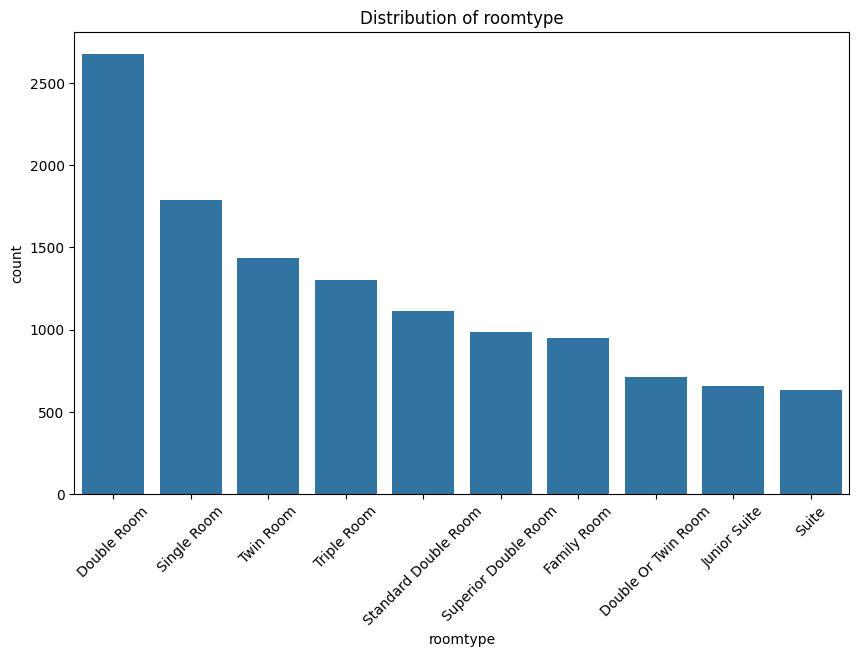

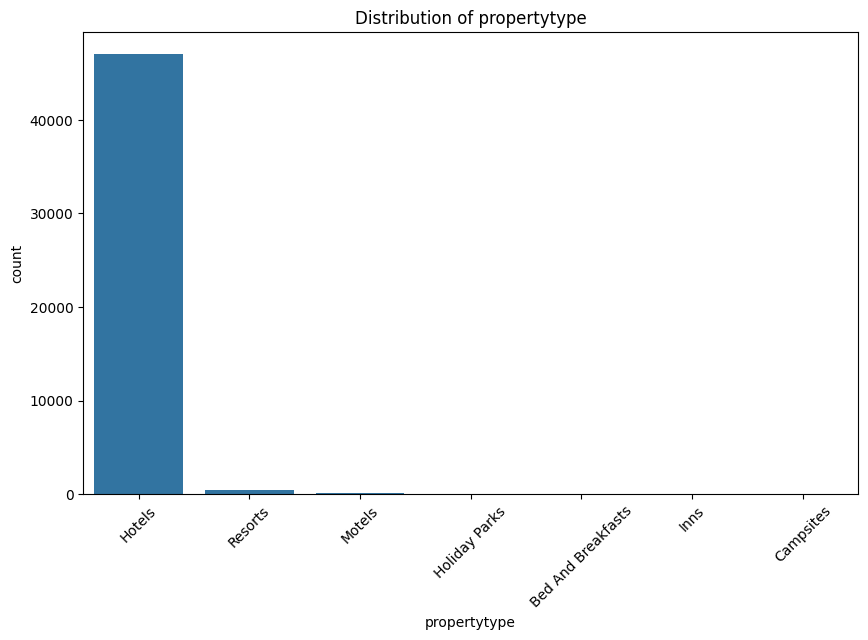

In [62]:
# The code loops through the roomtype and propertytype columns, creating a count plot for each. 
# It filters the data to show only the top 10 most frequent categories in each column and orders these categories by their frequency. The plots are styled with titles and rotated x-axis labels, and they are displayed one by one.
categorical_columns = ['roomtype', 'propertytype']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    # Filter the data to get the top 10 most frequent categories
    top_10 = df[column].value_counts().nlargest(10).index
    sns.countplot(x=column, data=df[df[column].isin(top_10)], order=top_10)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


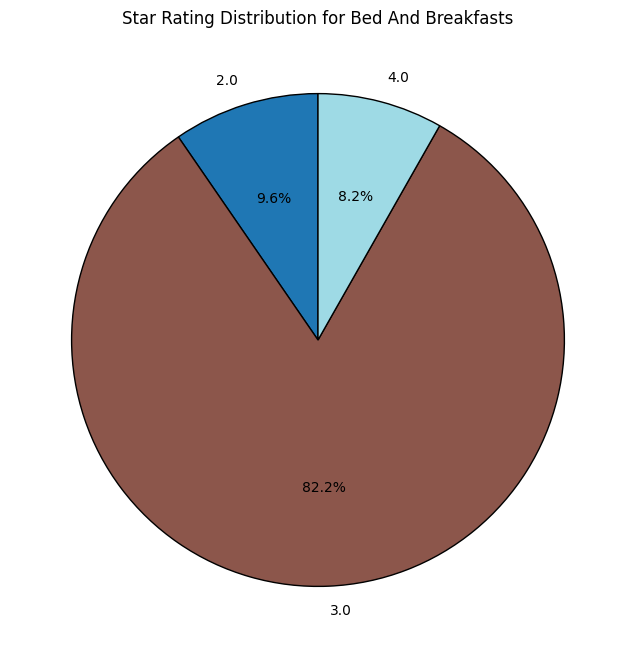

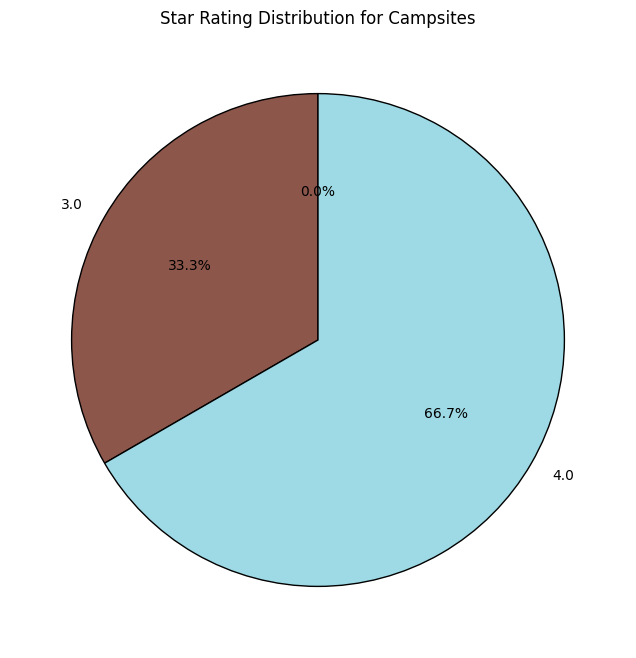

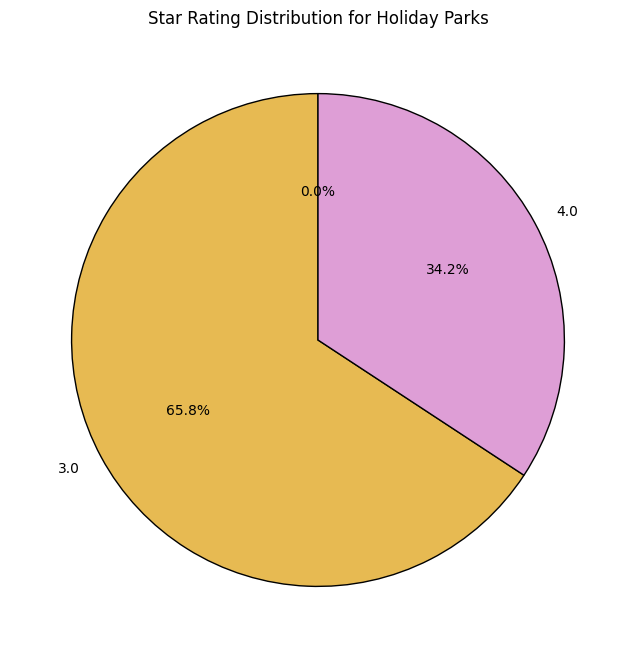

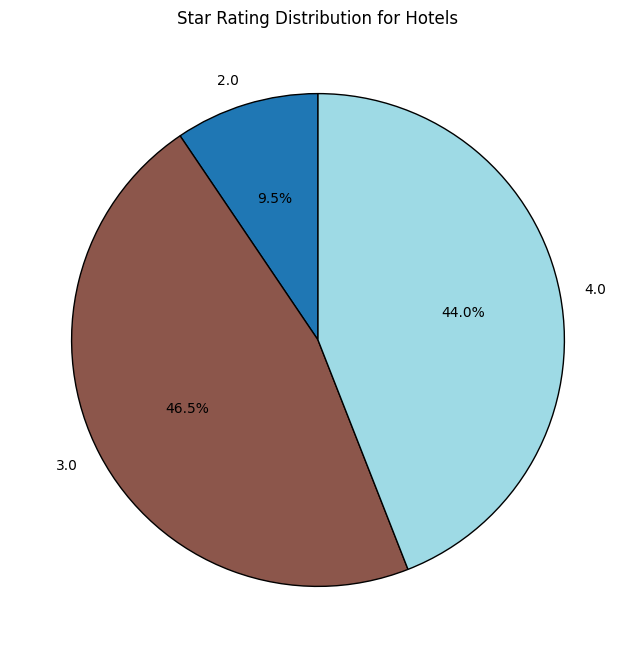

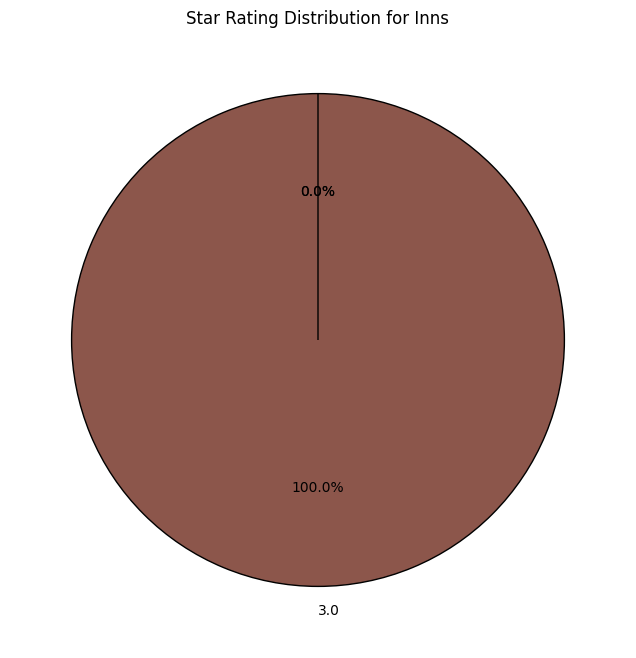

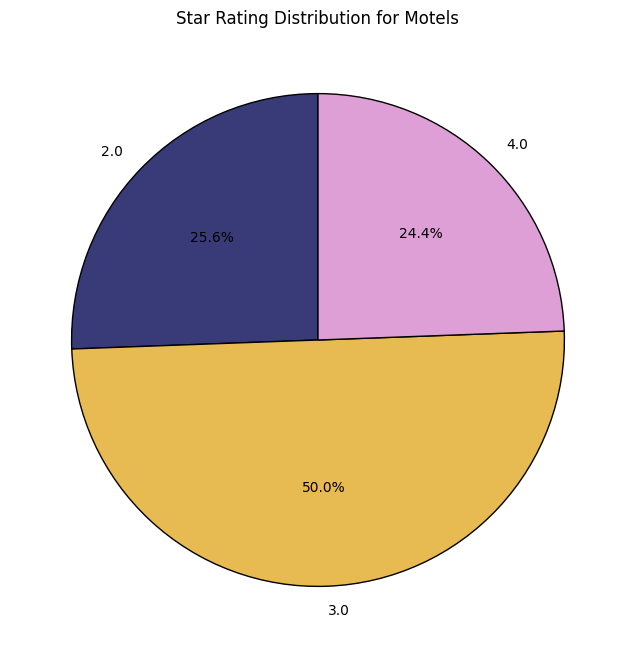

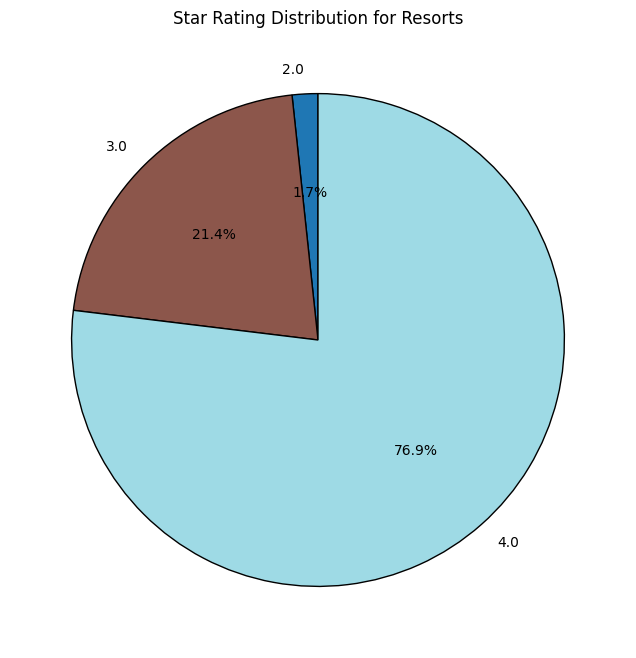

In [64]:
# This code generates and displays pie charts for the star rating distribution of different property types. Each pie chart is customized with colors from a color map, percentages displayed on slices, and a title indicating the property type. 
# The size of the figure is set to 8x8 inches, and each chart uses a distinct color map if there are more property types than available color maps.
# Group by property type and star rating and count occurrences

property_star_counts = df.groupby(['propertytype', 'starrating']).size().unstack(fill_value=0)

color_maps = plt.get_cmap('tab20'), plt.get_cmap('tab20'), plt.get_cmap('tab20b')

# Plot pie charts for each property type
for idx, property_type in enumerate(property_star_counts.index):
    plt.figure(figsize=(8, 8))
    num_colors = len(property_star_counts.columns)
    
    # Ensure the color map is large enough or loop through it
    cmap = color_maps[idx % len(color_maps)]
    
    # Ploting pie chart
    property_star_counts.loc[property_type].plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=cmap(np.linspace(0, 1, num_colors)),
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f'Star Rating Distribution for {property_type}')
    plt.ylabel('')  
    plt.show()

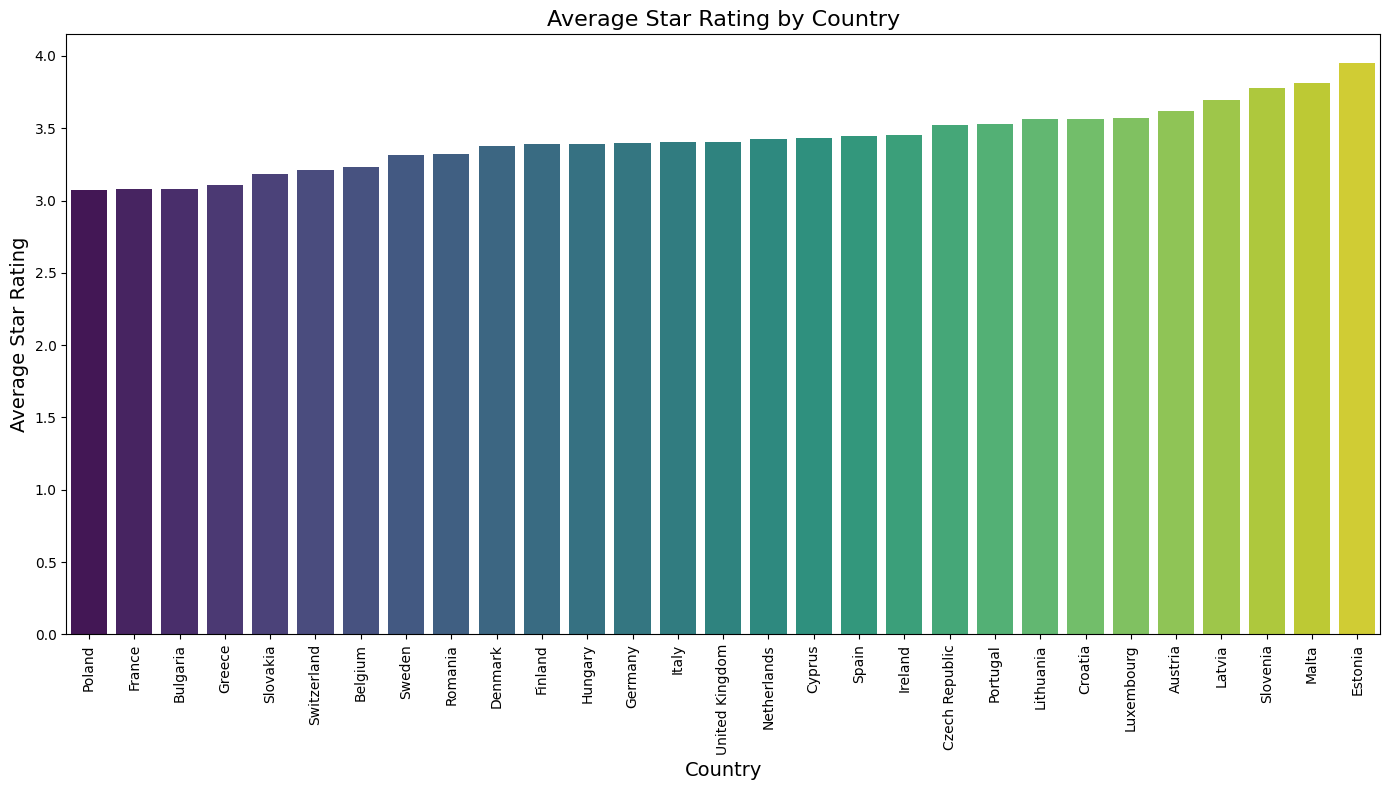

In [65]:
# This code generates a bar plot showing the average star rating of hotels in each country. The countries are plotted along the x-axis, and the average star ratings are on the y-axis. The countries are sorted by their average ratings in ascending order, and the plot uses the 'viridis' color palette. 
# The x-axis labels are rotated 90 degrees to ensure they are readable, and the plot is sized at 14x8 inches with a tight layout to fit all elements nicely.

country_rating_avg = df.groupby('country')['starrating'].mean().sort_values()

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x=country_rating_avg.index, y=country_rating_avg.values, palette='viridis')

# Set plot title and labels
plt.title('Average Star Rating by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Star Rating', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

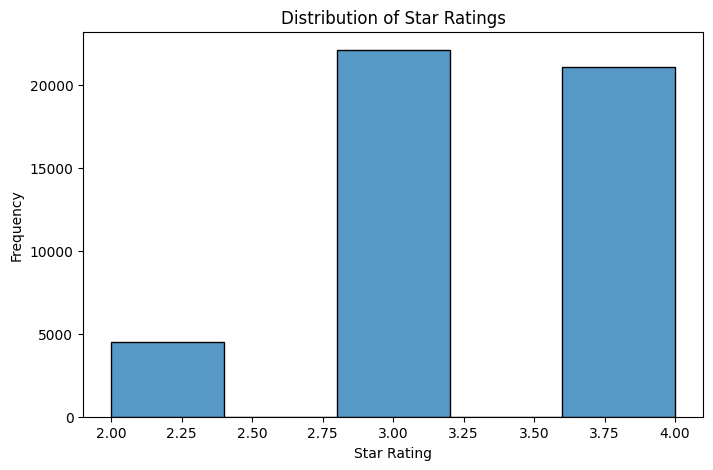

In [67]:
# The code generates a histogram showing the distribution of hotel star ratings, with the star ratings on the x-axis and the frequency of hotels on the y-axis. 
# The plot is sized to 8x5 inches, includes a KDE line for a smooth distribution curve, and is titled "Distribution of Star Ratings."
plt.figure(figsize=(8, 5))
sns.histplot(df['starrating'], bins=5)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()


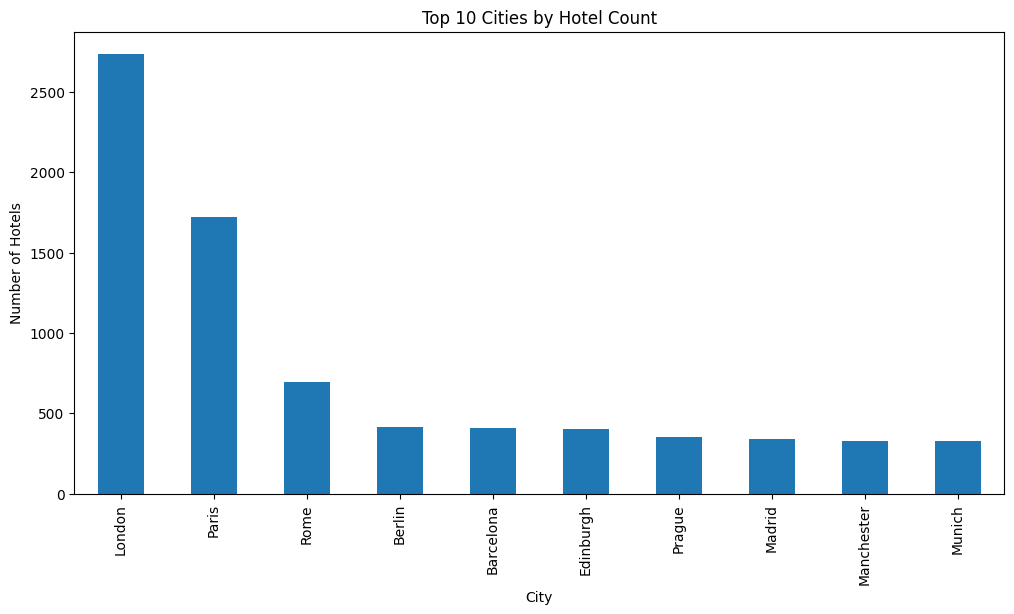

In [69]:
# The code generates a bar plot that visualizes the top 10 countries with the highest number of hotels. 
# The x-axis represents the country names, and the y-axis represents the number of hotels in each country. The plot is sized at 12x6 inches and is titled "Top 10 Countries by Hotel Count."

plt.figure(figsize=(12, 6))
df['city'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities by Hotel Count')
plt.xlabel('City')
plt.ylabel('Number of Hotels')
plt.show()

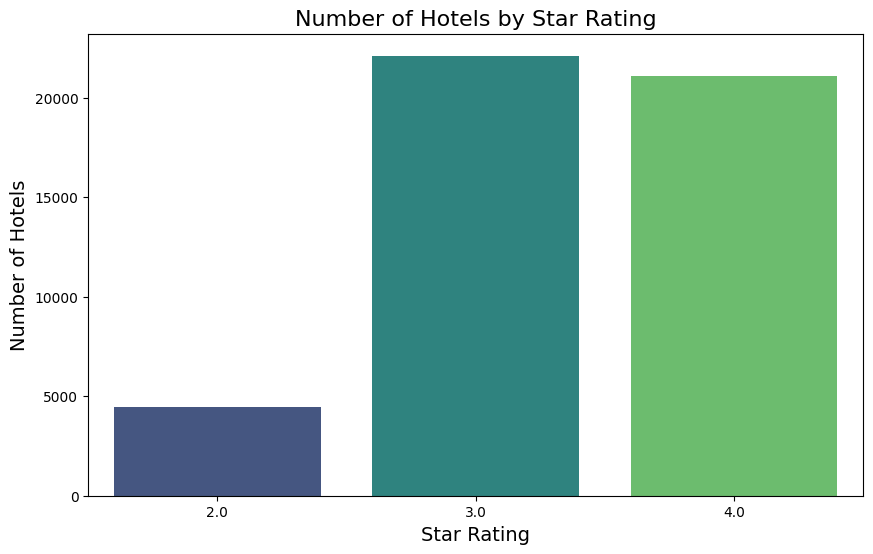

In [70]:
# This code creates a bar plot to visualize the number of hotels for each star rating using Seaborn and Matplotlib. 
rating_counts = df['starrating'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

# Set plot title and labels
plt.title('Number of Hotels by Star Rating', fontsize=16)
plt.xlabel('Star Rating', fontsize=14)
plt.ylabel('Number of Hotels', fontsize=14)

plt.show()

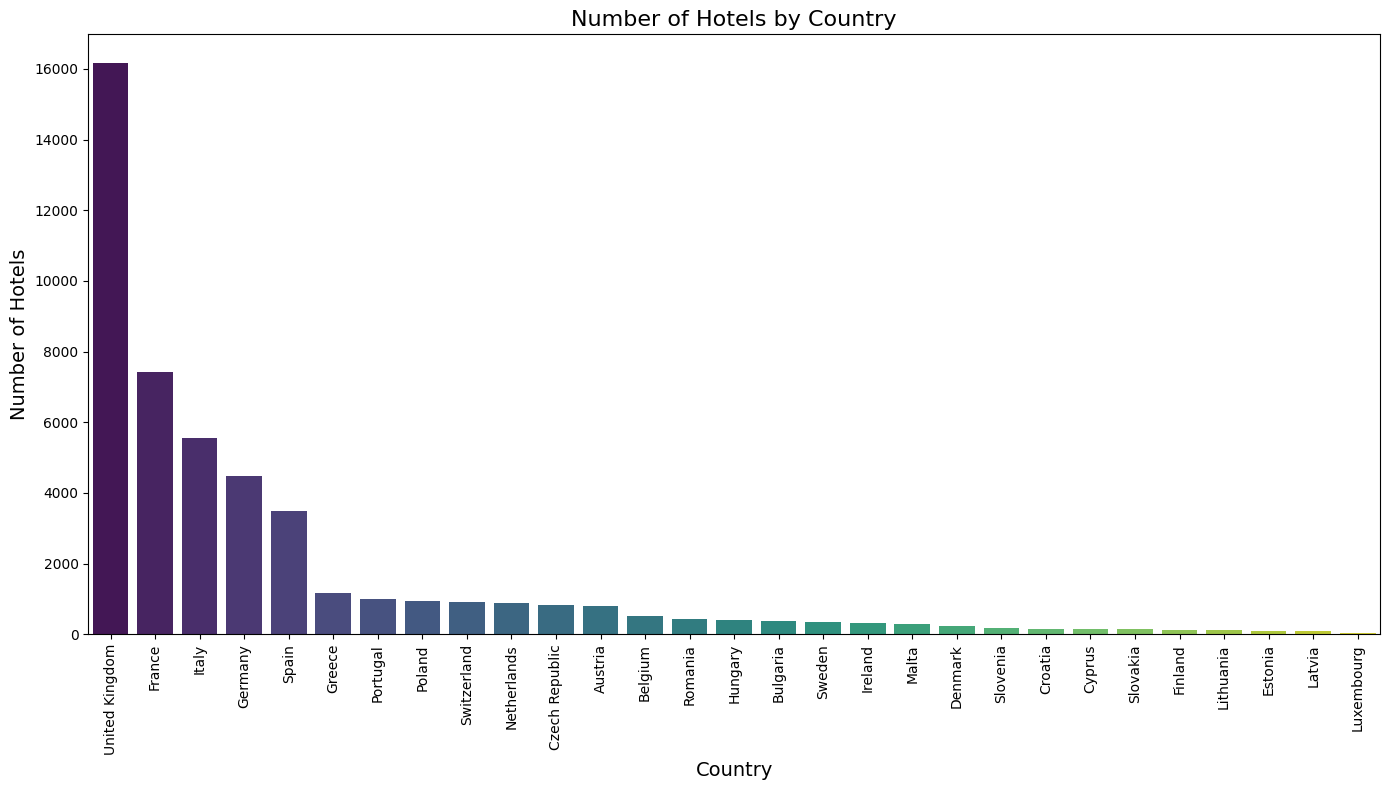

In [71]:
#The code counts the number of hotels in each country, then creates a bar plot to visualize this data. 
#The plot is styled with titles, labels, and a color palette, and the x-axis labels are rotated for better readability. Finally, the plot is displayed on the screen.
country_counts = df['country'].value_counts()

# Creating the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Set plot title and labels
plt.title('Number of Hotels by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Hotels', fontsize=14)

plt.xticks(rotation=90)

# For showig the plot
plt.tight_layout()
plt.show()

In [72]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)
df.head(1)

,index,hotelid,hotelname,tags,starrating,roomtype,country,city,propertytype,url
0,0,634876,The Old Cider House,airconditioning alarmclock carpeting closet co...,4.0,Double Room,United Kingdom,Nether Stowey,Hotels,https://www.agoda.com/en-gb/the-old-cider-hous...


In [222]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)
df.head(1)

,index,hotelid,hotelname,tags,starrating,roomtype,country,city,propertytype,url
0,0,634876,The Old Cider House,airconditioning alarmclock carpeting closet co...,4.0,Double Room,United Kingdom,Nether Stowey,Hotels,https://www.agoda.com/en-gb/the-old-cider-hous...


#Model training and evaluation

### Recommender function

In [75]:
# Initialize the TF-IDF Vectorizer with a maximum of 1000 features
tfidf = TfidfVectorizer(max_features=1000)

In [80]:
hotel_ids=df['hotelid'].unique().tolist()

# Creating a list of user ids
user_ids=[f'user{i}' for i in range(1,11)]

#initializing an list to store user history data
user_history_data=[]

In [81]:
for user_id in user_ids:
    #randomly select the number of hotels the user has stayed in(between 2 to 5)
    num_stays=random.randint(2,5)
    stayed_hotels = random.sample(hotel_ids,num_stays)
    #for each hotel the user has stayed in , add an entry to the user history data
    for hotel_id in stayed_hotels:
        # finding the details from the main dataset
        hotel_details=df[df['hotelid']==hotel_id].iloc[0]
        # create a record for the user's stay
        user_history_data.append({
            'user_id': user_id,
            'hotel_id': hotel_id,
            'roomtype': hotel_details['roomtype'],
            'country': hotel_details['country'],
            'city': hotel_details['city'],
            'starrating': hotel_details['starrating'],
            'property type': hotel_details['propertytype'],
            'tags': hotel_details['tags']
        })

# Convert the user history data into a DataFrame
user_history_df = pd.DataFrame(user_history_data)

# Print the user history DataFrame
print(user_history_df)

# Save user history DataFrame to a CSV file if needed
user_history_df.to_csv('HotelRecommend/user_history.csv', index=False)

   user_id  hotel_id                                           roomtype  \
0    user1   7639236                                        Single Room   
1    user1    785728                    Double Room - Disability Access   
2    user1    162125         Single Room with Private External Bathroom   
3    user1    430443                                        Single Room   
4    user1   5641107                                          Twin Room   
5    user2   3755589                                        Family Room   
6    user2    137811                          Single Room with Bathroom   
7    user2    311525                                Double or Twin Room   
8    user2    126923                              Executive Double Room   
9    user3   8099609                                      Vacation Home   
10   user3    158818                                Double or Twin Room   
11   user3    152625                                        Single Room   
12   user3   6376175     

OSError: Cannot save file into a non-existent directory: 'HotelRecommend'

In [82]:
df1=pd.read_csv('user_history.csv')

In [83]:
# Define a function to retrieve user interaction history from a DataFrame
def get_user_history(user_id, user_history_df):
    """
    Retrieves the history of interactions for a specific user from the user history DataFrame.

    Parameters:
    user_id (int or str): The unique identifier of the user.
    user_history_df (DataFrame): The DataFrame containing user interaction data, with a 'user_id' column.

    Returns:
    DataFrame: A subset of the user_history_df DataFrame containing only the records for the specified user.
    """
    # Filter the DataFrame to get only the records where 'user_id' matches the given user_id
    user_data = user_history_df[user_history_df['user_id'] == user_id]
    
    # Return the filtered DataFrame containing the user's interaction history
    return user_data


In [84]:
# Define a function to recommend hotels based on user preferences and historical data
def recommend(type, country, city, property, starrating, user_id=None,verbose = True):
    """
    Recommends hotels based on user preferences and historical data using TF-IDF and cosine similarity.

    Parameters:
    type (str): The type of room the user prefers.
    country (str): The country where the user wants to stay.
    city (str): The city where the user wants to stay.
    property (str): The type of property (e.g., hotel, hostel, guesthouse).
    starrating (int): The minimum star rating the user prefers.
    user_id (int or None, optional): The unique identifier for the user. Defaults to None.

    Returns:
    list: A list of recommended hotel IDs.
    """
    
    # Check if user_id is provided to fetch historical data
    if user_id:
        user_history = get_user_history(user_id, df1)  # Retrieve user's history from df1
        if not user_history.empty:
            # If user history exists, concatenate all tags from user history to create a user profile
            user_tags = ' '.join(user_history['tags'].tolist())
        else:
            # If no user history, use the current search preferences to create user_tags
            user_tags = f"{type} {country} {city} {property} {starrating}"
    else:
        # If no user_id provided, use current preferences to create user_tags
        user_tags = f"{type} {country} {city} {property} {starrating}"

    # Filter the DataFrame based on the given criteria
    temp = df[(df['country'] == country) & 
              (df['city'] == city) & 
              (df['starrating'] >= starrating) &
              (df['roomtype'] == type) & 
              (df['propertytype'] == property)]

    # Return an empty list if no hotels match the criteria
    if temp.empty:
        return []

    # Create a DataFrame from user tags to append to the filtered DataFrame
    user_tags_df = pd.DataFrame({'tags': [user_tags]})
    
    # Append user preferences to the filtered DataFrame
    temp = pd.concat([temp, user_tags_df], ignore_index=True)
    
    # Fit and transform the TF-IDF vectorizer on the combined 'tags' column
    vector = tfidf.fit_transform(temp['tags']).toarray()
    
    # Calculate the cosine similarity matrix for the TF-IDF vectors
    similarity = cosine_similarity(vector)
    
    # Get indices of the filtered hotels where tags match user preferences
    filtered_indices = temp[temp['tags'] == user_tags].index.tolist()
    
    # Recommend top 5 similar hotels for each filtered hotel
    for i in filtered_indices:
        # Sort hotels based on similarity scores in descending order, skipping the first match (itself)
        similar_hotels = sorted(list(enumerate(similarity[i])), key=lambda x: x[1], reverse=True)[1:6]
        # Print recommended hotels with their names, room types, and star ratings
        if verbose:
            for hotel in similar_hotels:
                print(tuple(temp.loc[hotel[0]][['hotelname', 'roomtype', 'starrating']]))
    
    # Extract hotel IDs of the top similar hotels
    recommended_ids = [temp.iloc[i[0]]['hotelid'] for i in similar_hotels]
    
    # Return the list of recommended hotel IDs
    return recommended_ids


In [85]:
recommend('Comfort Single Room','Germany','Munich','Hotels', 3.0)

('Novum Hotel Munchen - Am Hauptbahnhof', 'Comfort Single Room', np.float64(3.0))
('Hotel Freisinger Hof', 'Comfort Single Room', np.float64(4.0))
('Hotel am Schlosspark Zum Kurfurst', 'Comfort Single Room', np.float64(3.0))


[np.float64(937.0), np.float64(833250.0), np.float64(136273.0)]

In [86]:
recommend('Comfort Single Room','Germany','Munich','Hotels', 3.0, 'user1')

('Hotel am Schlosspark Zum Kurfurst', 'Comfort Single Room', np.float64(3.0))
('Hotel Freisinger Hof', 'Comfort Single Room', np.float64(4.0))
('Novum Hotel Munchen - Am Hauptbahnhof', 'Comfort Single Room', np.float64(3.0))


[np.float64(136273.0), np.float64(833250.0), np.float64(937.0)]

In [87]:
df=pd.read_csv("HoteRecommend_final.csv")
df.head(1)

,Unnamed: 0,hotelid,hotelname,tags,starrating,roomtype,country,city,propertytype,url
0,0,634876,The Old Cider House,Airconditioning Alarmclock Carpeting Closet Co...,4,Double Room,United Kingdom,Nether Stowey,Hotels,https://www.agoda.com/en-gb/the-old-cider-hous...


In [95]:
def evaluate_recommendations_no_history(df):
    """
    Evaluates the accuracy of the recommendation system using precision, recall, and F1-score
    without relying on user history.

    Parameters:
    df (DataFrame): The DataFrame containing hotel data.

    Returns:
    None: Prints the evaluation metrics.
    """
    # Lists to store metrics for each test case
    precision_list = []
    recall_list = []
    f1_list = []

    # Splitting data into training and testing sets
    train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

    # Test the recommendation for a random selection of user preferences from the test data
    for index, test_row in test_data.iterrows():
        user_pref_type = test_row['roomtype']
        user_pref_country = test_row['country']
        user_pref_city = test_row['city']
        user_pref_property = test_row['propertytype']
        user_pref_starrating = test_row['starrating']

        # Actual hotels that match the user's preferences
        actual_visited = test_data[(test_data['roomtype'] == user_pref_type) &
                                   (test_data['country'] == user_pref_country) &
                                   (test_data['city'] == user_pref_city) &
                                   (test_data['propertytype'] == user_pref_property) &
                                   (test_data['starrating'] >= user_pref_starrating)]
        
        # Extracting hotel IDs
        actual_visited_ids = set(actual_visited['hotelid'])

        # Getting recommendations from the system
        recommended_hotels = recommend(user_pref_type, user_pref_country, user_pref_city, user_pref_property, user_pref_starrating, verbose=False)
        recommended_ids = set(recommended_hotels) if recommended_hotels else set()

        # Create a common set of hotel IDs to compare
        all_hotels = actual_visited_ids.union(recommended_ids)
        
        # Generate y_true and y_pred based on the common set of hotel IDs
        y_true = [1 if hotel in actual_visited_ids else 0 for hotel in all_hotels]
        y_pred = [1 if hotel in recommended_ids else 0 for hotel in all_hotels]

        # Ensure non-empty y_true and y_pred to compute the scores
        if len(y_true) > 0 and len(y_pred) > 0:
            precision = precision_score(y_true, y_pred, zero_division=1)
            recall = recall_score(y_true, y_pred, zero_division=1)
            f1 = f1_score(y_true, y_pred, zero_division=1)
            
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)

    # Calculate average metrics
    average_precision = sum(precision_list) / len(precision_list) if precision_list else 0
    average_recall = sum(recall_list) / len(recall_list) if recall_list else 0
    average_f1 = sum(f1_list) / len(f1_list) if f1_list else 0

    # Print the evaluation metrics
    print(f"Average Precision: {average_precision:.2f}")
    print(f"Average Recall: {average_recall:.2f}")
    print(f"Average F1-Score: {average_f1:.2f}")

# Example usage
# Assuming 'hotelid' column exists in the dataset
df['hotelid'] = ['hotel' + str(i) for i in range(len(df))]  # Example hotel IDs

# Evaluate the recommendation system without historical data
evaluate_recommendations_no_history(df)

Average Precision: 0.86
Average Recall: 0.96
Average F1-Score: 0.89
